<a href="https://colab.research.google.com/github/Varun-dasari/INFO5731_Spring2020/blob/master/5731ASN4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [0]:
import nltk; nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
!python3 -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [0]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy

In [0]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 552kB 37.3MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=d6ef806ce90593d9e42f4161c16126fddac7268e32d755515d50747e9cf603fa
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=7f01ec955bab784be10fc92e3355c148369b187717b8240c19c83162aeeb2061
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [0]:
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [0]:
#stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [0]:
#Importing the dataset of Assignment 3
df = pd.read_csv('/content/SentimetalAnalysis.csv',encoding= 'unicode_escape')
print(df.REVIEW.unique())
df.head()

['The acting, cinematography, sound design, and the script itself is phenomenal. This movie is a triumph. Joaquin Pheonix deserves an Oscar win for this tbh.'
 'I will stop watching movies if Joaquin Phoenix is not awarded Oscar for his tremendous acting.'
 'Miserable and Unpleasant Slog of a Movie about Nothing' "I don't get it"
 'Stop comparing it with Endgame'
 'I have never left a review for any title, good or bad but this is such a piece of garbage that I registered an IMDB account just to vent my opinion. I want these 2 hours of my life back'
 'just a joke,the movie.'
 'Creative actor Joaquin creativity embodied the role of the Joker film deserves more than 10'
 "The ending is what matters in a movie. And this movie has a kind of ending which would leave many speechless. It's indeed a masterpiece:)"
 'Overrated and badly directed film with a misleading title'
 'Over-hyped, overacted with no proper entertainment - The Millennial Joker'
 "I don't get what everyone else seems to be 

,DOCID,REVIEW,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,SENTIMENT
0,1,"The acting, cinematography, sound design, and ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positive
1,2,I will stop watching movies if Joaquin Phoenix...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positive
2,3,Miserable and Unpleasant Slog of a Movie about...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative
3,4,I don't get it,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral
4,5,Stop comparing it with Endgame,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral


In [0]:
data = df.REVIEW.values.tolist()
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
data = [re.sub('\s+', ' ', sent) for sent in data]
data = [re.sub("\'", "", sent) for sent in data]
pprint(data[:1])

['The acting, cinematography, sound design, and the script itself is '
 'phenomenal. This movie is a triumph. Joaquin Pheonix deserves an Oscar win '
 'for this tbh.']


In [0]:
res = [sub.split() for sub in data] 
print(res)

[['The', 'acting,', 'cinematography,', 'sound', 'design,', 'and', 'the', 'script', 'itself', 'is', 'phenomenal.', 'This', 'movie', 'is', 'a', 'triumph.', 'Joaquin', 'Pheonix', 'deserves', 'an', 'Oscar', 'win', 'for', 'this', 'tbh.'], ['I', 'will', 'stop', 'watching', 'movies', 'if', 'Joaquin', 'Phoenix', 'is', 'not', 'awarded', 'Oscar', 'for', 'his', 'tremendous', 'acting.'], ['Miserable', 'and', 'Unpleasant', 'Slog', 'of', 'a', 'Movie', 'about', 'Nothing'], ['I', 'dont', 'get', 'it'], ['Stop', 'comparing', 'it', 'with', 'Endgame'], ['I', 'have', 'never', 'left', 'a', 'review', 'for', 'any', 'title,', 'good', 'or', 'bad', 'but', 'this', 'is', 'such', 'a', 'piece', 'of', 'garbage', 'that', 'I', 'registered', 'an', 'IMDB', 'account', 'just', 'to', 'vent', 'my', 'opinion.', 'I', 'want', 'these', '2', 'hours', 'of', 'my', 'life', 'back'], ['just', 'a', 'joke,the', 'movie.'], ['Creative', 'actor', 'Joaquin', 'creativity', 'embodied', 'the', 'role', 'of', 'the', 'Joker', 'film', 'deserves', 

In [0]:
#Bigrams & Trigrams
bigram = gensim.models.Phrases(res, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[res], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [0]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [0]:
#bigrams
data_words_bigrams = make_bigrams(res)
data_words_bigrams

[['The',
  'acting,',
  'cinematography,',
  'sound',
  'design,',
  'and',
  'the',
  'script',
  'itself',
  'is',
  'phenomenal.',
  'This',
  'movie',
  'is',
  'a',
  'triumph.',
  'Joaquin',
  'Pheonix',
  'deserves',
  'an',
  'Oscar',
  'win',
  'for',
  'this',
  'tbh.'],
 ['I',
  'will',
  'stop',
  'watching',
  'movies',
  'if',
  'Joaquin',
  'Phoenix',
  'is',
  'not',
  'awarded',
  'Oscar',
  'for',
  'his',
  'tremendous',
  'acting.'],
 ['Miserable',
  'and',
  'Unpleasant',
  'Slog',
  'of',
  'a',
  'Movie',
  'about',
  'Nothing'],
 ['I', 'dont', 'get', 'it'],
 ['Stop', 'comparing', 'it', 'with', 'Endgame'],
 ['I',
  'have',
  'never',
  'left',
  'a',
  'review',
  'for',
  'any',
  'title,',
  'good',
  'or',
  'bad',
  'but',
  'this',
  'is',
  'such',
  'a',
  'piece',
  'of',
  'garbage',
  'that',
  'I',
  'registered',
  'an',
  'IMDB',
  'account',
  'just',
  'to',
  'vent',
  'my',
  'opinion.',
  'I',
  'want',
  'these',
  '2',
  'hours',
  'of',
  'my

In [0]:
from collections import Counter

bigram_counts = Counter()
for cell in data_words_bigrams:
    for bigram in cell:
        bigram_counts[bigram] += 1

bigram_counts.most_common(5)

[('the', 44), ('a', 37), ('and', 35), ('of', 35), ('is', 27)]

In [0]:
id2word = corpora.Dictionary(res)
texts = res
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)]]


In [0]:
id2word[13]

'is'

In [0]:
#LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto')

In [0]:
# Top 10
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.049*"and" + 0.042*"the" + 0.035*"of" + 0.032*"I" + 0.021*"was" + '
  '0.018*"a" + 0.014*"movie" + 0.014*"this" + 0.011*"is" + 0.011*"The"'),
 (1,
  '0.037*"and" + 0.025*"is" + 0.025*"a" + 0.025*"Joaquin" + 0.019*"was" + '
  '0.019*"acting" + 0.019*"Phoenix" + 0.019*"of" + 0.013*"with" + 0.013*"the"'),
 (2,
  '0.036*"the" + 0.022*"but" + 0.015*"a" + 0.015*"Joaquin" + 0.015*"Ive" + '
  '0.015*"about" + 0.015*"of" + 0.008*"The" + 0.008*"actor" + 0.008*"Nothing"'),
 (3,
  '0.031*"a" + 0.024*"I" + 0.024*"the" + 0.016*"and" + 0.016*"with" + '
  '0.016*"The" + 0.016*"was" + 0.008*"is" + 0.008*"best" + 0.008*"can"'),
 (4,
  '0.038*"of" + 0.034*"the" + 0.029*"I" + 0.019*"a" + 0.019*"this" + '
  '0.015*"for" + 0.014*"is" + 0.010*"acting" + 0.010*"from" + 0.010*"by"'),
 (5,
  '0.030*"the" + 0.030*"is" + 0.025*"and" + 0.025*"a" + 0.025*"movie" + '
  '0.020*"of" + 0.015*"I" + 0.015*"have" + 0.015*"worst" + 0.010*"in"'),
 (6,
  '0.022*"of" + 0.013*"Joaquin" + 0.013*"Joker" + 0.013*"Oscar" 

In [0]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
coherence_model_lda = CoherenceModel(model=lda_model, texts=res, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.58521852357105

Coherence Score:  0.29622172773789707


In [0]:
#Visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.021301  0.124169       1        1  19.373741
4     -0.095971  0.099259       2        1  13.169828
9      0.050569  0.030897       3        1  13.028717
5      0.090044  0.021201       4        1  12.163542
8      0.104465 -0.042661       5        1  11.026730
1      0.027673 -0.040980       6        1   9.225364
2     -0.029421 -0.078841       7        1   7.399116
3     -0.038638 -0.034424       8        1   6.320013
7     -0.089122 -0.044276       9        1   4.797065
6     -0.040898 -0.034344      10        1   3.495882, topic_info=       Term       Freq      Total Category  logprob  loglift
24        I  18.000000  18.000000  Default  30.0000  30.0000
75       to  11.000000  11.000000  Default  29.0000  29.0000
8       and  25.000000  25.000000  Default  28.0000  28.0000
15    movie  16.000000  16.000000  Default  27.0000  27.0000
25  Phoenix   5.000000   5.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
12      for   0.470432  10.492260  Topic10  -4.4678   0.2488
24        I   0.466407  18.561247  Topic10  -4.4764  -0.3302
5         a   0.461852  25.916302  Topic10  -4.4862  -0.6738
94       in   0.461852   7.890435  Topic10  -4.4862   0.5154
49     with   0.461852   6.265823  Topic10  -4.4862   0.7460

[565 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
518       3  0.732661        !!!
371       4  0.740739     "arts"
337       1  0.699985  "everyone
406       4  0.740739          &
329       9  0.881760   (mother)
...     ...       ...        ...
541       8  0.828780    wouldnt
419       9  0.881760        wow
248       4  0.740739     years.
447       2  0.730380        yet
444       2  0.730380        you

[618 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 10, 6, 9, 2, 3, 4, 8, 7])

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [0]:
Data = df.drop(columns=['DOCID'])
data1 = Data['REVIEW'].tolist()





In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data['REVIEW'], Data['SENTIMENT'], random_state=1)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = data1
vectorizer = TfidfVectorizer(max_features=100)
X_train_vectorizer = vectorizer.fit_transform(X_train)
X_test_vectorizer = vectorizer.fit_transform(X_test)

In [0]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectorizer, y_train) 
predictions = naive_bayes.predict(X_test_vectorizer)

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report

print(classification_report(y_test, predictions, target_names=['Neutral','Positive','Negative','Po']))

              precision    recall  f1-score   support

     Neutral       0.33      0.29      0.31         7
    Positive       0.50      0.25      0.33         8
    Negative       0.00      0.00      0.00         1
          Po       0.47      0.78      0.58         9

    accuracy                           0.44        25
   macro avg       0.32      0.33      0.31        25
weighted avg       0.42      0.44      0.40        25



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
#SVM
from sklearn import model_selection, naive_bayes, svm

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train_vectorizer,y_train)
predictions_SVM = SVM.predict(X_test_vectorizer)
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  32.0


In [0]:
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
print("precision_score:", precision_score(y_test, predictions_SVM, average='macro'))
print("recall_score:", recall_score(y_test, predictions_SVM, average='macro'))
print("f1_score:", f1_score(y_test, predictions_SVM, average='macro'))

precision_score: 0.16964285714285715
recall_score: 0.23809523809523808
f1_score: 0.19710144927536233


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [0]:
import pandas as pd
sf_train = pd.read_csv('/content/train.csv')
sf_test = pd.read_csv('/content/test.csv')

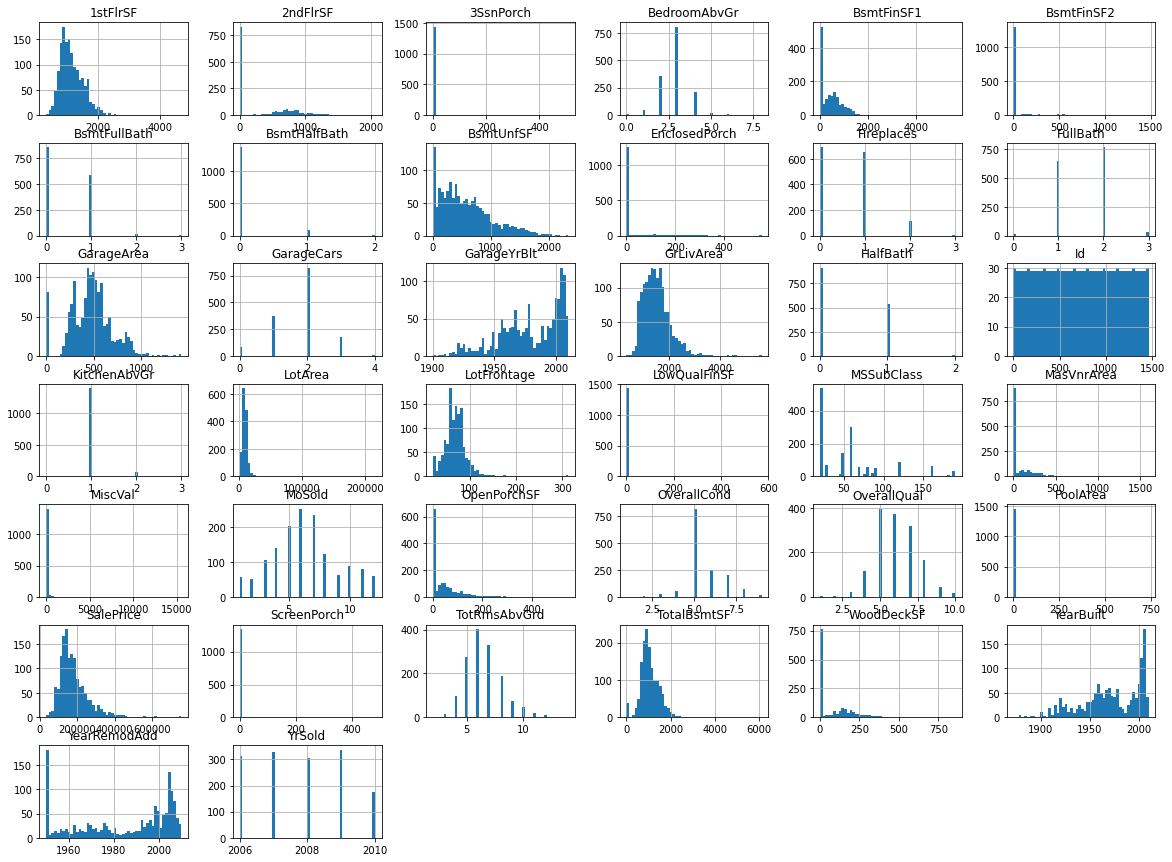

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
sf_train.hist(bins=50, figsize=(20,15))
plt.savefig("Plots_Picture")
plt.show()

In [5]:
corr_matrix = sf_train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

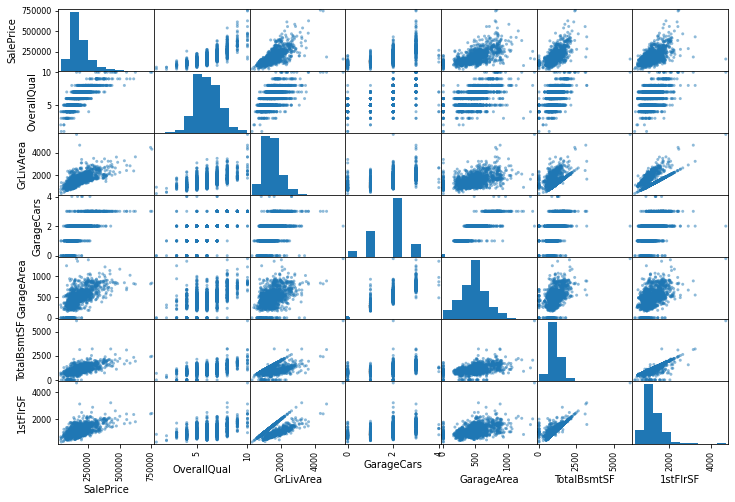

In [6]:
from pandas.plotting import scatter_matrix
attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF"]
scatter_matrix(sf_train[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

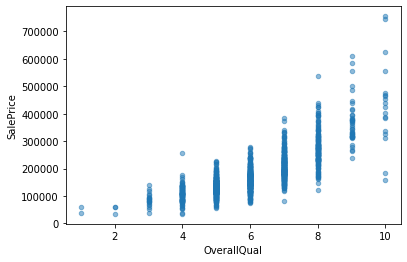

In [7]:
sf_train.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.5)
plt.savefig('scatter.png')

In [0]:
X_Train = sf_train[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','HalfBath','LotArea','BsmtFullBath','BsmtUnfSF','BedroomAbvGr','ScreenPorch','PoolArea','MoSold','3SsnPorch']]
X_Train=X_Train.fillna(X_Train.mean())
Y_Train = sf_train['SalePrice']
Y_Train=Y_Train.fillna(Y_Train.mean())
X_Test = sf_test[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','HalfBath','LotArea','BsmtFullBath','BsmtUnfSF','BedroomAbvGr','ScreenPorch','PoolArea','MoSold','3SsnPorch']]
X_Test = X_Test.fillna(X_Test.mean())

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print('Linear Regression R squared is :": %.4f' % regressor.score(X_Train, Y_Train))

Linear Regression R squared is :": 0.8005
